In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
sys.path.append('../../reproducible_figures/scripts/')
import rep_fig_vis as rfv
sys.path.append('../scripts/')
import create_dataset_utils as cdu
import paired_embeddings_models as pem
import data_vis_utils as dvu
from DataSetImagePresence import DataSetImagePresence
import loadpaths_pecl
path_dict_pecl = loadpaths_pecl.loadpaths()
import shapely
from tqdm import tqdm, tqdm_notebook
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import ast 
import seaborn as sns


Font size is set to 10


In [3]:
df_mapping_locs, _ = cdu.load_names_unique_locs()
df_mapping_locs.head()

,tuple_coords,footprintWKT,count,name_loc
0,"(-2.165105, 50.956811)","POLYGON((-2.17221 50.9523,-2.17221 50.96132,-2...",53410,UKBMS_loc-0000
1,"(-2.646667, 50.775285)","POLYGON((-2.6537 50.77075,-2.6537 50.77982,-2....",51809,UKBMS_loc-0001
2,"(-0.828484, 50.888106)","POLYGON((-0.8357 50.88368,-0.8357 50.89253,-0....",48596,UKBMS_loc-0002
3,"(-1.966038, 50.59722)","POLYGON((-1.97311 50.59273,-1.97311 50.60171,-...",46522,UKBMS_loc-0003
4,"(-0.22994099999999998, 52.409243)","POLYGON((-0.23747 52.40486,-0.23747 52.41363,-...",44130,UKBMS_loc-0004


In [10]:
df_per_loc = cdu.load_species_dataset()
df_per_loc

,tuple_coords,Melanargia galathea,Pieris napi,Aphantopus hyperantus,Aglais io,Polyommatus icarus,Vanessa atalanta,Lycaena phlaeas,Pararge aegeria,Gonepteryx rhamni,...,Tyria jacobaeae,Euclidia glyphica,Odezia atrata,Melitaea cinxia,Carterocephalus palaemon,Nymphalis polychloros,Nymphalis antiopa,Erebia epiphron,n_visits,name_loc
0,"(-7.824283, 54.259247)",0.0,0.696970,0.242424,0.333333,0.272727,0.060606,0.121212,0.545455,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,UKBMS_loc-1044
1,"(-7.457325, 54.15933)",0.0,0.419355,0.387097,0.354839,0.000000,0.064516,0.000000,0.870968,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,UKBMS_loc-1420
2,"(-6.949025, 54.883646)",0.0,0.363636,0.409091,0.045455,0.000000,0.090909,0.000000,0.818182,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,UKBMS_loc-0979
3,"(-6.753205, 55.169256)",0.0,0.448276,0.413793,0.034483,0.448276,0.034483,0.034483,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,UKBMS_loc-0925
4,"(-6.405594, 55.228089)",0.0,0.718750,0.187500,0.375000,0.437500,0.093750,0.500000,0.218750,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,UKBMS_loc-0962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,"(1.606988, 52.214525)",0.0,0.600000,0.266667,0.533333,0.333333,0.400000,0.733333,0.600000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,UKBMS_loc-0914
1451,"(1.609902, 52.250415)",0.0,0.627907,0.348837,0.674419,0.465116,0.930233,0.883721,1.000000,0.302326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,UKBMS_loc-0053
1452,"(1.613601, 52.655059)",0.0,0.871795,0.307692,0.410256,0.076923,0.512821,0.025641,0.589744,0.051282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,UKBMS_loc-1445
1453,"(1.632597, 52.348661)",0.0,0.238095,0.238095,0.476190,0.000000,0.309524,0.000000,0.666667,0.023810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,UKBMS_loc-1477


In [55]:
ds = DataSetImagePresence(image_folder=path_dict_pecl['s2bms_images'],
                        presence_csv=path_dict_pecl['s2bms_presence'],
                        dataset_name='s2bms',
                        species_process='all',
                        shuffle_order_data=False,
                        zscore_im=True, use_testing_data=False,
                        augment_image=False, mode='val')
# tmp = os.path.join(path_dict_pecl['repo'], 'content/split_indices_s2bms_2024-08-14-1459.pth')
# train_ds, val_ds, test_ds = ds.split_into_train_val(tmp)


Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.


In [12]:
orig = ds[0]

In [51]:
new = ds[0]

(360, 361, 4)
(4, 360, 361)


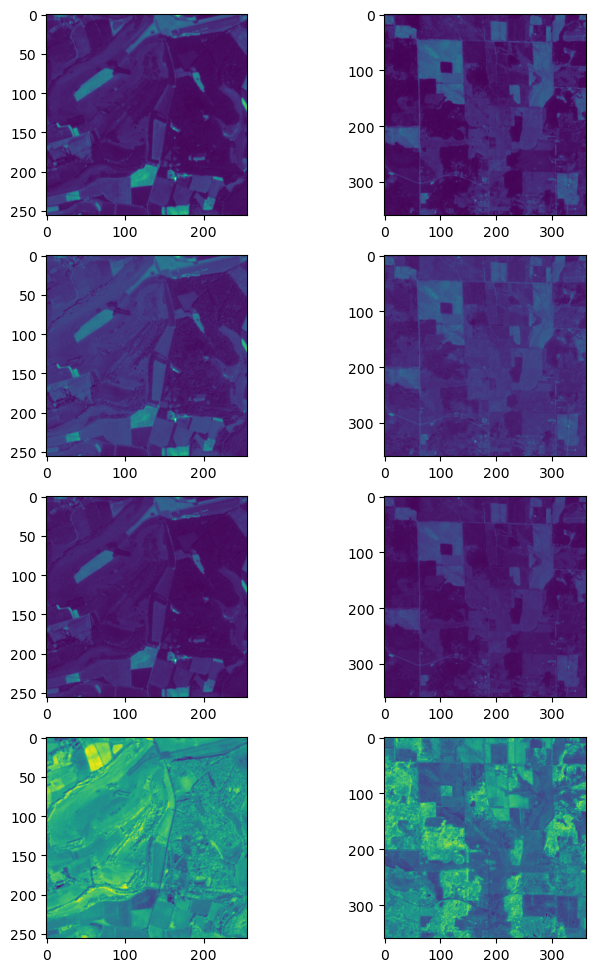

In [52]:
# assert np.all(np.isclose(orig[1], new[1]))

fig, ax = plt.subplots(4, 2, figsize=(8, 12))
for i_data, data in enumerate([orig, new]):
    for channel in range(orig[0].shape[0]):
        ax[channel, i_data].imshow(data[0][channel, ...].numpy())

In [79]:
dl = DataLoader(ds, batch_size=128, shuffle=False)
batch = next(iter(dl))
batch[0].shape, batch[1].shape

(torch.Size([128, 4, 256, 256]), torch.Size([128, 62]))

In [91]:
tmp = F.normalize(batch[0], p=2, dim=1).numpy()
print(tmp.shape)

# tmp = F.normalize(batch[1], p=2, dim=1).numpy()
# print(tmp.shape, batch[1].shape)
# fig, ax = plt.subplots(2, 2, figsize=(12, 12))
# ax[0, 0].imshow(batch[1].numpy())
# ax[0, 1].imshow(tmp)

print(np.power(tmp, 2).sum((1, 2, 3)))
# cax = ax[1, 0].imshow(np.dot(tmp, tmp.T))
# fig.colorbar(cax, ax=ax[1, 0])

(128, 4, 256, 256)
[65535.992 65536.01  65536.    65536.    65536.    65536.    65536.
 65536.    65536.    65536.01  65536.01  65536.    65536.01  65535.996
 65536.    65536.    65535.996 65536.    65536.    65536.    65536.
 65536.    65536.    65535.996 65535.996 65535.996 65536.    65536.
 65536.    65536.    65536.01  65536.01  65535.996 65536.01  65535.996
 65536.    65536.    65536.    65535.996 65535.996 65536.    65535.99
 65535.996 65536.01  65536.01  65536.    65535.996 65536.    65535.996
 65536.    65536.    65536.    65536.    65536.    65536.    65535.99
 65535.996 65536.    65536.    65536.    65536.01  65536.    65536.
 65536.    65536.    65536.    65535.996 65536.    65535.996 65536.
 65536.    65536.    65536.    65536.    65536.    65535.996 65536.
 65536.    65535.996 65535.996 65536.    65536.01  65536.    65535.992
 65535.996 65536.01  65536.    65536.    65535.992 65536.    65536.
 65535.996 65536.    65535.992 65535.996 65536.01  65535.996 65535.99
 65536.01  

In [54]:
tmp = os.path.join(path_dict_pecl['repo'], 'content/split_indices_s2bms_2024-08-14-1459.pth')
train_ds, val_ds, test_ds = ds.split_into_train_val(tmp)
print(len(train_ds), len(val_ds), len(test_ds), len(ds))

947 196 186 1329


(<Axes: title={'center': 'L10152475, id 454'}>, <Axes: >)

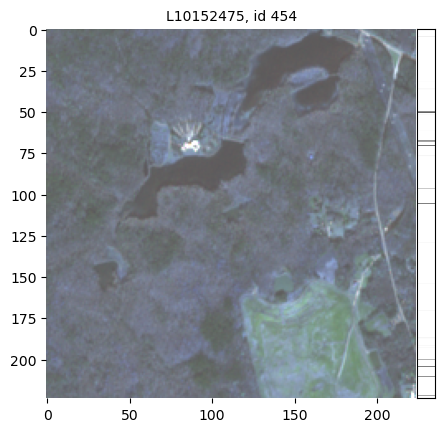

In [53]:
# ds = DataSetImagePresence(image_folder='/Users/t.vanderplas/data_offline/satbird/USA_winter/images/',
#                         presence_csv='/Users/t.vanderplas/data_offline/satbird/USA_winter/df_satbird-usawinter_presence.csv',
#                         species_process='all',
#                         zscore_im=True, use_testing_data=False,
#                         augment_image=True, mode='train', dataset_name='satbird-usawinter')
# ds.load_image('L10011486').shape
# ds.suffix_images
ds.plot_image(index=454)


In [6]:
tmp = pd.read_csv(path_dict_pecl['s2bms_presence'], index_col=0)
tmp = tmp.sort_values(by='name_loc')
# save first 16 row
# tmp.iloc[:18].to_csv('/Users/t.vanderplas/repos/PECL/tests/data_test/presence_tests/ukbms_presence_test16.csv')
# pd.read_csv('/Users/t.vanderplas/repos/PECL/tests/data_test/presence_tests/ukbms_presence_test16.csv', index_col=0)

In [53]:
ds.find_image_path('UKBMS_loc-0023')
# ds.suffix_images

'/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/UKBMS_sent2_ds/sent2-4band/mix-2018-2019/m-06-09/sent2-4band_UKBMS_loc-0023_y-2019_m-06-09.tif'

In [32]:
point_locs = ds.df_presence.tuple_coords
# return point_locs
point_locs = [shapely.geometry.Point(ast.literal_eval(loc)) for loc in point_locs]
gdf_bms = gpd.GeoDataFrame(ds.df_presence,  geometry=point_locs)
# gdf_bms.crs = {'init': 'epsg:4326'} 

path_map = '/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/GBR_adm/GBR_adm0.shp'
gdf_uk = gpd.read_file(path_map)
# gdf_uk.crs
gdf_bms = gdf_bms.reset_index(drop=True)
gdf_bms.index = gdf_bms.index.astype(np.int32)
gdf_bms.crs = gdf_uk.crs 
gdf_bms.to_file('/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/UKBMS_sent2_ds/s2-bms.shp', index=False)

/var/folders/vg/lgb0bh9x2yx0ny2lk_h8_ylc0000gr/T/ipykernel_19264/4164301144.py:14: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_bms.to_file('/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/UKBMS_sent2_ds/s2-bms.shp', index=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


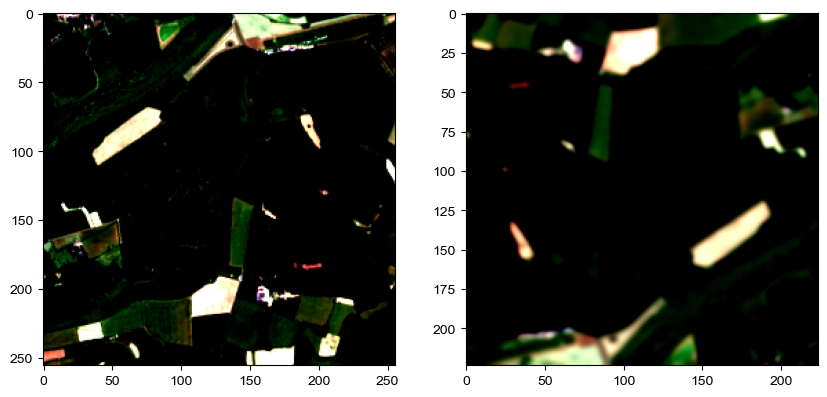

In [ ]:
im, pres = ds[0]
ds.mode = 'train'
im_transformed = ds.transform_data(im)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im[:3, :, :].permute(1, 2, 0))
ax[1].imshow(im_transformed[:3, :, :].permute(1, 2, 0))

## Results 

- v16 pred / n layers 1 
- v17 pred incl enc / n layers 2 
- v18 pecl / n layers 1 
- v19 post-pecl pred / n layers 1
- v20: pred incl enc / n_layers 2 / freeze True 
- v21: pred / n layers 2 / freeze True 
- v22: pred incl enc / n layers 2 / freeze False 

Findings:
- PECL doesn't work atm (v19 v20). Why does post-pecl pred not work though (V20)? Does passing on models in general work?
- Freezing resnet doesn't matter for pred_incl_enc (v20 v22)
- Pred incl enc works better than pred only (v22 vs v21, v17 vs v16)
- All same plateau .. Check for a trivial solution? (Different random seed.. )

 NON-weighted (B)CE:
- v114: top 20, pretrained False??, BCE, 1 layer
- v116: top 20, seco, BCE, 1 layer
- v117: top 20, seco, BCE, 2 layer
- v118: All species, Seco, BCE, 2 layer mlp pred
- v119: top 20, imagenet, BCE, 2 layer [WORSE than seco]
- v120: top 20, imagenet, BCE, 2 layer, NOT frozen [=> train loss lower but 
val loss higher] 
- v121: pecl
- v122: top 20, seco, CE, 2 layer, [converged solution much further from mean preds than with BCE (0.2 vs 0.03). BCE loss also increases. ]
- v124: top 20, seco, BCE, 2 layer, 32 enc channels [everything above 64 channels.] [Same as 64, just tiny bit slower to converge. ]
- v125: top 20, seco, BCE, 2 layer, 128 channels. [ bit quicker than 64, higher top10 acc]
- v126: top 20, seco, BCE, 2 layer, 256 channels. [again bit quicker than 128]
- v127: top 20, seco, BCE, 2 layer, 512 channels. [slightly quicker than 256/similar]
- v128: top 20, seco, CE, 2 layer, 512 channels 
- v130, top 20, seco, BCE, 2 layer, 512 channels [identical to v127] 
- v131: top 20, seco,  CE, 2 layer, 512 => also identical to CE. 

- v136: top 20, seco, weighted BCE, 2 layer, 512. [faster convergence than non-weighted BCE. ]
- v137: top 20, seco, weighted BCE, 2 layer, 256, lr 1e3
- v138: all sp, seco, weighted BCE, 2 layer, 256, 1e-3 [just ended up predicting the mean.!]
- v139: all sp, seco,  BCE, 2 layer, 246, 1e-3

- v158: PECL (from v139), all, lr 1e-5, batch 64, knn=5, freeze_resnet=False, freeze_resnet_fc_loaded_model=True, epochs=20
- v159: pred_incl_enc (from v158), lr 3e-4, BCE, freeze_resnet=True, 

- v162: PECL (from v139), all, lr 1e-5, batch 64, knn=2, freeze_resnet=False, freeze_resenet_fc=True, epoch=30. 

Trying contrastive regularisation (pred_and_pecl): same as v139 otherwise [EXCEPT FOR LR WHICH IS 1e-3 ON v139]. LR 3e-4, batchsize 64.
- v164 alpha ratio=0.02/0.01?
- v165 alpha ratio=0.05
- v166 alpha ratio=0.1
- v167 alpha ratio=0.2
- v168 alpha ratio=0.5
- v169: alpha ratio=1 
- v170: alpha ratio=0 
- v171: alpha ratio=0, lr=1e-3 [is be identical to v139]
- v172: alpha ratio=0.1, lr=1e-3
- v173, alpha ratio=0.5 [FAILED]
- v174, alpha ratio=0.2
- v175, alpha ratio=0.5
- v176, alpha ratio=0.1, knn=5

Ran 16 models:
Conclusions: top_20 slightly higher acc than all (expected I guess). BCE > wBCE. PECL CR > alpha=0. 5~=2 knn. PECL CR no effect on wBCE because ratio too low. 
--------
- 177, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True)
- 178, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.1, True)
- 180, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 42, 0, True)
- 181, iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 42, 0.1, True)
- 182, iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, True, 'bce', 'seco', 42, 0, True)
- 183, iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, True, 'bce', 'seco', 42, 0.1, True)
- 184, iteration 7: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, True, 'weighted-bce', 'seco', 42, 0, True)
- 185, iteration 8: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, True, 'weighted-bce', 'seco', 42, 0.1, True)

- 186, iteration 9: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True)
- 187, iteration 10: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.1, True)
- 189, iteration 11: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 42, 0, True)
- 190, iteration 12: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 42, 0.1, True)
- 191, iteration 13: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 5, True, 'bce', 'seco', 42, 0, True)
- 192, iteration 14: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 5, True, 'bce', 'seco', 42, 0.1, True)
- 193, iteration 15: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 5, True, 'weighted-bce', 'seco', 42, 0, True)
- 194, iteration 16: ('pred_and_pecl', 'top_20', 256, 0.001, 64, 5, True, 'weighted-bce', 'seco', 42, 0.1, True)
-------------------
- 196, repeat of it 178 but with RANDOMCROP and JITTER. 
- 197, repeat of it 178 but with RANDOMCROP only
- v198, repeat of it 178 but with RANDOMCROp and JITTER and BLUR

New series, all with just RANDOMCROP. different seeds. All using the same train/val split. 
---------
- 199, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 19, 0, True)
- 200, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 19, 0.1, True)
- 201, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 86, 0, True)
- 202, iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 86, 0.1, True)
- 203, iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 17, 0, True)
- 204, iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 32, 2, True, 'bce', 'seco', 17, 0.1, True)
- 205, iteration 7: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True)
- 206, iteration 8: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True)
- 207, iteration 9: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True)
- 208, iteration 10: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True)
- 209, iteration 11: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True)
- 210, iteration 12: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True)
- 211, iteration 13: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 19, 0, True)
- 212, iteration 14: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 19, 0.1, True)
- 213, iteration 15: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 86, 0, True)
- 214, iteration 16: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 86, 0.1, True)
- 215, iteration 17: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 17, 0, True)
- 216, iteration 18: ('pred_and_pecl', 'all', 256, 0.001, 128, 2, True, 'bce', 'seco', 17, 0.1, True)
-------------------

Combinations will be run in this order:
---------
- 217, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.5, True)
- 218, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 1, True)
- iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 2, True)
- iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 4, True)
- iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 8, True)
- iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.5, True)
- iteration 7: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 1, True)
- iteration 8: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 2, True)
- iteration 9: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 4, True)
- iteration 10: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 8, True)
- iteration 11: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.5, True)
- iteration 12: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 1, True)
- iteration 13: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 2, True)
- iteration 14: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 4, True)
- iteration 15: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 8, True)
- iteration 16: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 19, 0.5, True)
- iteration 17: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 19, 1, True)
- iteration 18: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 19, 2, True)
- iteration 19: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 19, 4, True)
- iteration 20: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 19, 8, True)
- iteration 21: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 86, 0.5, True)
- iteration 22: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 86, 1, True)
- iteration 23: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 86, 2, True)
- iteration 24: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 86, 4, True)
- iteration 25: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 86, 8, True)
- iteration 26: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 17, 0.5, True)
- iteration 27: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 17, 1, True)
- iteration 28: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 17, 2, True)
- 235, iteration 29: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 17, 4, True)
- 236, iteration 30: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'weighted-bce', 'seco', 17, 8, True)
-------------------

- 260: try out with drop out 0.2, seed 42, alpha 0.1, knn=5.

Sweep of drop out: 271 u/i 306
---------
- iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0)
- iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0.05)
- iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0.1)
- iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0.2)
- iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0.3)
- iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0.5)
- iteration 7: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0)
- iteration 8: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0.05)
- iteration 9: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0.1)
- iteration 10: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0.2)
- iteration 11: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0.3)
- iteration 12: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0.5)
- iteration 13: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0)
- iteration 14: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0.05)
- iteration 15: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0.1)
- iteration 16: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0.2)
- iteration 17: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0.3)
- iteration 18: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0, True, 0.5)
- iteration 19: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0)
- iteration 20: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0.05)
- iteration 21: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0.1)
- iteration 22: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0.2)
- iteration 23: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0.3)
- iteration 24: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 19, 0.1, True, 0.5)
- iteration 25: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0)
- iteration 26: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0.05)
- iteration 27: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0.1)
- iteration 28: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0.2)
- iteration 29: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0.3)
- iteration 30: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0.5)
- iteration 31: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0)
- iteration 32: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0.05)
- iteration 33: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0.1)
- iteration 34: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0.2)
- iteration 35: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0.3)
- iteration 36: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0.5)
-------------------

vnums 307-312 (last one crashed and burned), with train.val geo split
---------
- iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 2)
- iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.1, True, 0, 2)
- iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 2)
- iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0, 2)
- iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 2)
- iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0, 2)
-------------------

vnums 314-319, with train val test geo split 
---------
- iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 2)
- iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.1, True, 0, 2)
- iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 2)
- iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0, 2)
- iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 2)
- iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0, 2)
-------------------

# Final results
### Prediction model hparams;
All combinations have been run in this order:
---------
- 324, iteration 1: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 1)
- 325, iteration 2: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 2)
- 326, iteration 3: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 3)
- 327, iteration 4: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 1)
- 328, iteration 5: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 2)
- 329, iteration 6: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 3)
- 330, iteration 7: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 1)
- 331, iteration 8: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 2)
- 332, iteration 9: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 3)
- 333, iteration 10: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 1)
- 334, iteration 11: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 2)
- 335, iteration 12: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 3)
- 336, iteration 13: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 1)
- 337, iteration 14: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 2)
- 338, iteration 15: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 3)
- 339, iteration 16: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 1)
- 340, iteration 17: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 2)
- 341, iteration 18: ('pred', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 3)
- 342, iteration 19: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 1)
- 343, iteration 20: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 2)
- 344, iteration 21: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 42, 0, True, 0, 3)
- 345, iteration 22: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 1)
- 346, iteration 23: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 2)
- 347, iteration 24: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 17, 0, True, 0, 3)
- 348, iteration 25: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 1)
- 349, iteration 26: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 2)
- 350, iteration 27: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'imagenet', 86, 0, True, 0, 3)
- 351, iteration 28: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 1)
- 352, iteration 29: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 2)
- 353, iteration 30: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 42, 0, True, 0, 3)
- 354, iteration 31: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 1)
- 355, iteration 32: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 2)
- 356, iteration 33: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 17, 0, True, 0, 3)
- 357, iteration 34: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 1)
- 358, iteration 35: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 2)
- 359, iteration 36: ('pred', 'all', 256, 0.0005, 64, 2, True, 'bce', 'seco', 86, 0, True, 0, 3)
-------------------

### Trying PECL with two alpha settings, knn=2 and HARD labels:
---------
- 361, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.1, True, 0, 3)
- 362, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 42, 0.3, True, 0, 3)
- 363, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.1, True, 0, 3)
- 364, iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 17, 0.3, True, 0, 3)
- 365, iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.1, True, 0, 3)
- 366, iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, True, 'bce', 'seco', 86, 0.3, True, 0, 3)
-------------------

### Trying PECL with two alpha settings, knn=2 and SOFT labels:
All combinations have been run in this order:
---------
- 367, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 42, 0.1, True, 0, 3)
- 368, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 42, 0.3, True, 0, 3)
- 369, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 17, 0.1, True, 0, 3)
- 370, iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 17, 0.3, True, 0, 3)
- 371, iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 86, 0.1, True, 0, 3)
- 372, iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 2, False, 'bce', 'seco', 86, 0.3, True, 0, 3)
-------------------

### alpha = 0.1, knn=1, 5, soft
---------
- iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 42, 0.1, True, 0, 3)
- iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 17, 0.1, True, 0, 3)
- iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 86, 0.1, True, 0, 3)
- iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, False, 'bce', 'seco', 42, 0.1, True, 0, 3)
- iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, False, 'bce', 'seco', 17, 0.1, True, 0, 3)
- iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 5, False, 'bce', 'seco', 86, 0.1, True, 0, 3)
-------------------
---------
- 378, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 42, 0.1, True, 0, 3)
- 379, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 17, 0.1, True, 0, 3)
-------

### Full 50 epochs, alpha = 0,1 knn=1
---------
- 380, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 42, 0, True, 0, 3)
- 381, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 42, 0.1, True, 0, 3)
- 382, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 17, 0, True, 0, 3)
- 383, iteration 4: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 17, 0.1, True, 0, 3)
- 384, iteration 5: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 86, 0, True, 0, 3)
- 385, iteration 6: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, True, 'bce', 'seco', 86, 0.1, True, 0, 3)
-------------------

### sweep of alpha, bs, knn with soft knn alpha>0
386 through 404 (1 or 2 vnums missing because broken)

## freeze = false, seco 3 layer alpha=0
All combinations have been run in this order:
---------
- 405, iteration 1: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 42, 0, False, 0, 3)
- 406, iteration 2: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 17, 0, False, 0, 3)
- 407, iteration 3: ('pred_and_pecl', 'all', 256, 0.001, 64, 1, False, 'bce', 'seco', 86, 0, False, 0, 3)
- 408, iteration 4: ('pred_and_pecl', 'all', 256, 0.0001, 64, 1, False, 'bce', 'seco', 42, 0, False, 0, 3)
- 409, iteration 5: ('pred_and_pecl', 'all', 256, 0.0001, 64, 1, False, 'bce', 'seco', 17, 0, False, 0, 3)
- 410, iteration 6: ('pred_and_pecl', 'all', 256, 0.0001, 64, 1, False, 'bce', 'seco', 86, 0, False, 0, 3)
-------------------

In [ ]:
final_model, _ = pem.train_pecl(
                    model=None,
                    training_method='pred', 
                    pecl_distance_metric='softmax',
                    species_process='all',
                    use_class_weights=True,
                    n_enc_channels=256, lr=1e-3,
                    n_epochs_max=2, batch_size=64, 
                    pecl_knn=5, pecl_knn_hard_labels=True,
                    freeze_resnet=True, alpha_ratio_loss=0,
                    n_layers_mlp_resnet=1, n_layers_mlp_pred=1,
                    pred_train_loss='bce',
                    pretrained_resnet='seco',
                    # pretrained_resnet=False,
                    # save_model=True,
                    use_lr_scheduler=False,
                    normalise_embedding='l2')

Seed set to 42
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Pytorch version is 2.2.0.dev20231210
Found 1336 out of 1455 images in the image folder.
Shuffling data.
Loaded 62 class weights on cpu.
Class weights now on mps:0.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name             | Type       | Params
------------------------------------------------
0 | resnet           | ResNet     | 11.3 M
1 | prediction_model | Sequential | 15.9 K
------------------------------------------------
15.9 K    Trainable params
11.3 M    Non-trainable params
11.3 M    Total params
45.308    Total estimated model params size (MB)


Original state dict had 122 keys. Recovered 120 keys from SECO checkpoint.
No unexpected missing keys (only decoder layers are missing).
Loaded Resnet with SeCo weights.
Freezing all but last layer: True, last layer: True.
Freezing prediction model: False.
-- Starting training at 2024-03-04 22:12:51.740930 with 2 epochs.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
_pickle.UnpicklingError: pickle data was truncated


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.
Restoring states from the checkpoint path at /Users/t.vanderplas/models/PECL/lightning_logs/version_323/checkpoints/best_checkpoint_val-epoch=01-val_loss=0.58-train_loss=0.61.ckpt
Loaded model weights from the checkpoint at /Users/t.vanderplas/models/PECL/lightning_logs/version_323/checkpoints/best_checkpoint_val-epoch=01-val_loss=0.58-train_loss=0.61.ckpt


-- Finished training at 2024-03-04 22:17:18.251366.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_bce_loss          │       0.5793591737747192       │
│          test_ce_loss          │       26.516523361206055       │
│ test_distance_pred_label_means │       0.3240928649902344       │
│           test_loss            │       0.5793591737747192       │
│         test_mae_loss          │       0.3449871838092804       │
│         test_mse_loss          │      0.13421475887298584       │
│       test_pred-bce_loss       │       0.5793591737747192       │
│        test_top_10_acc         │      0.43387094140052795       │
│         test_top_1_acc         │      0.46236559748649597       │
│        test_top_20_acc         │       0.426344096660614        │
│         test_top_5_acc         │       0.5268816947937012       │
│     test_weighted-bce_loss     │       33.083290100097656       │
│     test_weighted-ce_loss      │       97.87179565429688        │
└────────────────────────────────┴────────────────────────────────┘

Stats saved as PECL-ImEn_2024-03-04-2219_vnum-323_stats.pkl at /Users/t.vanderplas/models/PECL/stats/PECL-ImEn_2024-03-04-2219_vnum-323_stats.pkl


In [ ]:
tmp_model = pem.load_model(filename='PECL-ImEn_2024-02-27-1944_vnum-139.data')

post_pecl_model, _ = pem.train_pecl(
                    model=tmp_model,
                    freeze_resnet_fc_loaded_model=True,
                    training_method='pecl', 
                    pecl_distance_metric='softmax',
                    species_process='all', 
                    use_class_weights=True,
                    n_enc_channels=256, lr=1e-5,
                    n_epochs_max=30, batch_size=64, 
                    pecl_knn=2, pecl_knn_hard_labels=True,
                    freeze_resnet=False, 
                    pred_train_loss='weighted-bce',
                    pretrained_resnet='seco',
                    use_lr_scheduler=True)

final_model, _ = pem.train_pecl(
                    model=post_pecl_model,
                    training_method='pred_incl_enc', 
                    pecl_distance_metric='softmax',
                    species_process='all', 
                    use_class_weights=False,
                    n_enc_channels=256, lr=3e-4,
                    n_epochs_max=50, batch_size=64, 
                    pecl_knn=5, pecl_knn_hard_labels=True,
                    freeze_resnet=True, 
                    pred_train_loss='bce',
                    pretrained_resnet='seco',
                    use_lr_scheduler=True)

   

In [ ]:
tmp_model = pem.load_model(filename='PECL-ImEn_2024-02-27-1944_vnum-139.data')


Loaded ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [ ]:
tmp = pem.load_stats(timestamp='2024-03-04-2135')
print(tmp.keys())
tmp['df_metrics']

Loaded stats from PECL-ImEn_2024-03-04-2135_vnum-317_stats.pkl at /Users/t.vanderplas/models/PECL/stats/
dict_keys(['hparams', 'v_num', 'log_dir', 'logger', 'df_metrics'])


,val_top_1_acc,val_ce_loss,val_top_5_acc,val_ratio_pred_pecl,val_weighted-bce_loss,val_pecl-softmax_loss,val_mse_loss,val_loss,val_weighted-ce_loss,val_mae_loss,train_pred-bce_pecl-softmax_loss,val_pred-bce_pecl-softmax_loss,val_bce_loss,val_top_10_acc,val_top_20_acc,val_distance_pred_label_means
0,0.000000,27.294716,0.059375,1.680221,42.066093,0.413991,0.191083,1.109587,96.692322,0.414054,NaN,1.109587,0.695596,0.095312,0.372656,0.399074
1,0.494898,27.134035,0.504082,1.247491,26.052189,0.407229,0.090565,0.895663,93.520683,0.281074,NaN,0.895663,0.488435,0.505612,0.500765,0.253448
2,0.494898,26.500446,0.589796,0.696624,5.551728,0.407741,0.017845,0.681315,93.400032,0.102027,1.030818,0.681315,0.273574,0.686224,0.739796,0.063657
3,0.494898,26.163158,0.595918,0.612704,2.116730,0.407735,0.013733,0.648784,93.276237,0.067296,0.776210,0.648784,0.241049,0.686224,0.845663,0.020510
4,0.494898,26.147835,0.595918,0.602966,1.761652,0.407586,0.013417,0.644776,93.233505,0.064613,0.664922,0.644776,0.237190,0.685714,0.845663,0.014162
5,0.494898,26.145630,0.595918,0.599973,1.695727,0.407312,0.013290,0.643135,93.226440,0.064659,0.650624,0.643135,0.235823,0.686224,0.839286,0.010525
6,0.494898,26.144363,0.600000,0.599573,1.683800,0.407187,0.013272,0.642702,93.219154,0.065511,0.647489,0.642702,0.235515,0.686224,0.845663,0.010082
7,0.494898,26.175951,0.595918,0.599734,1.669517,0.406744,0.013214,0.641928,93.214912,0.065689,0.645824,0.641928,0.235183,0.686224,0.845663,0.010237
8,0.494898,26.131172,0.590816,0.604126,1.767047,0.406130,0.013298,0.642406,93.211067,0.067329,0.643869,0.642406,0.236276,0.689796,0.845663,0.011952
9,0.494898,26.144611,0.604082,0.610741,1.866633,0.403757,0.013323,0.640667,93.188881,0.069043,0.640405,0.640667,0.236910,0.688775,0.845663,0.013992


In [ ]:
tmp_model = pem.ImageEncoder(n_species=ds.n_species, n_bands=4, freeze_resnet=False,
                             pecl_distance_metric='softmax',
                             training_method='pecl',
                             pretrained_resnet='seco')

No class weights.
Original state dict had 122 keys. Recovered 120 keys from SECO checkpoint.
No unexpected missing keys (only decoder layers are missing).
Loaded Resnet with SeCo weights.
Freezing all but last layer: False, last layer: False.
Freezing prediction model: True.


/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
tmp_model = pem.ImageEncoder.load_from_checkpoint('/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/models/PECL/lightning_logs/version_309/checkpoints/best_checkpoint_val-epoch=35-val_loss=0.23-train_loss=0.00.ckpt')

Loaded 62 class weights on cpu.
Class weights now on mps:0.


/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Original state dict had 122 keys. Recovered 120 keys from SECO checkpoint.
No unexpected missing keys (only decoder layers are missing).
Loaded Resnet with SeCo weights.
Freezing all but last layer: True, last layer: False.
Freezing prediction model: False.


In [ ]:
# tmp_model.eval()

In [ ]:
train_dl, val_dl = _
# val_dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)


for i_batch, batch in enumerate(val_dl):
    im, label = batch 
    im = im.to(tmp_model.device)
    print(im.shape[0])
    im_enc = tmp_model.forward(im)
    pred = tmp_model.prediction_model(im_enc)
    assert pred.shape == label.shape, f'pred.shape={pred.shape}, label.shape={label.shape}'
    if i_batch == 1:
        break

64
64


Text(0.5, 25.52222222222222, 'embedding dimension')

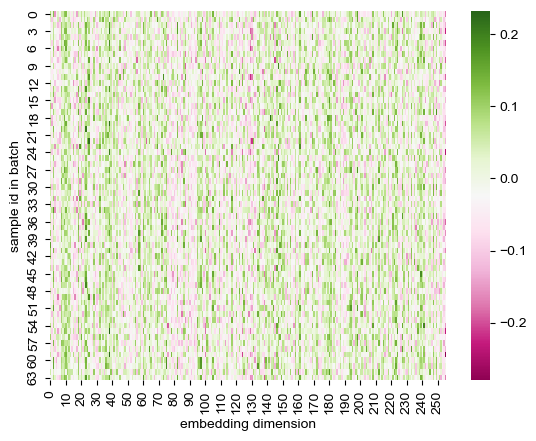

In [ ]:
sns.heatmap(im_enc.cpu().detach().numpy(), cmap='PiYG')    
plt.ylabel('sample id in batch')
plt.xlabel('embedding dimension')

(64, 62)
(64, 62) (64,)


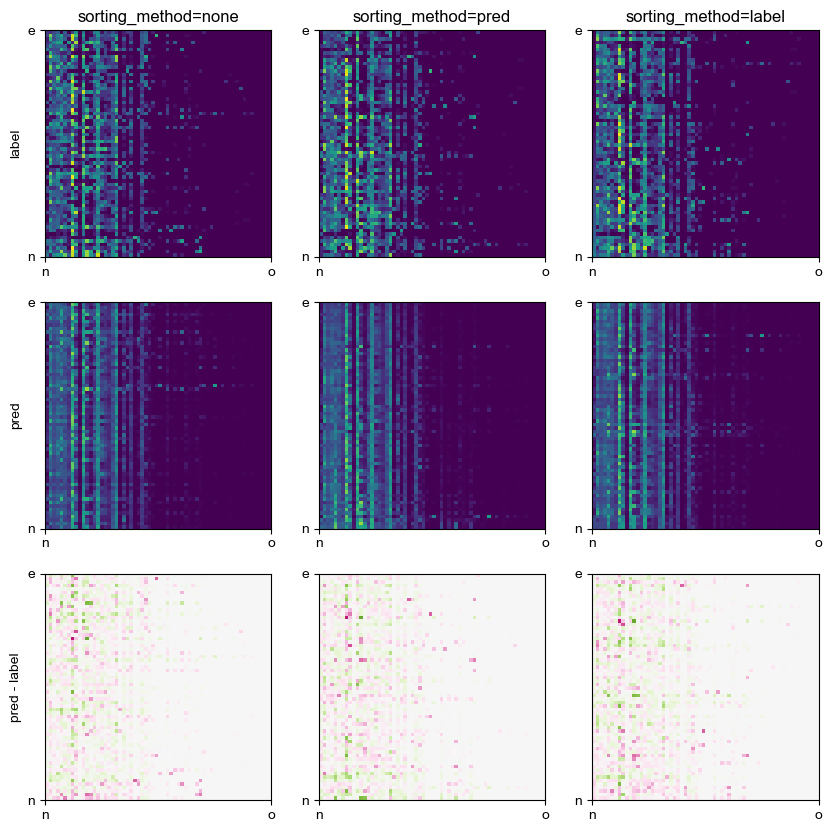

In [ ]:
if type(pred) == torch.Tensor:
    if pred.device != 'cpu':
        pred = pred.cpu()
    pred = pred.detach().numpy()
if type(label) == torch.Tensor:
    if label.device != 'cpu':
        label = label.cpu()
    label = label.detach().numpy()
pred_zero_mean = pred - pred.mean(0)
label_zero_mean = label - label.mean(0)

assert pred.max() <= 1, f'pred.max()={pred.max()}'
assert pred.min() >= 0, f'pred.min()={pred.min()}'
assert label.max() <= 1, f'label.max()={label.max()}'
assert label.min() >= 0, f'label.min()={label.min()}'

# accuracy = 

print(label.shape)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for col, sorting_method in enumerate(['none', 'pred', 'label']):
    if sorting_method == 'none':
        idx = np.arange(label.shape[0])
    elif sorting_method == 'pred':
        idx = np.argsort(pred.sum(1))
    elif sorting_method == 'label':
        idx = np.argsort(label[:, 0])
        print(label.shape, idx.shape)
    
    ax[0, col].imshow(label[idx, :], vmin=0, vmax=1, cmap='viridis', extent='none', interpolation='none')
    ax[1, col].imshow(pred[idx, :], vmin=-0, vmax=1, cmap='viridis', extent='none', interpolation='none')
    ax[2, col].imshow(pred[idx, :] - label[idx, :], vmin=-1, vmax=1, cmap='PiYG', extent='none', interpolation='none')
    ax[0, col].set_title(f'sorting_method={sorting_method}')
    if col == 0:
        ax[0, col].set_ylabel('label')
        ax[1, col].set_ylabel('pred')
        ax[2, col].set_ylabel('pred - label')

In [ ]:
np.mean(np.abs(pred - label)), np.mean(np.abs(label.mean(0)[None, :] - label))

(0.057485964, 0.06598642)

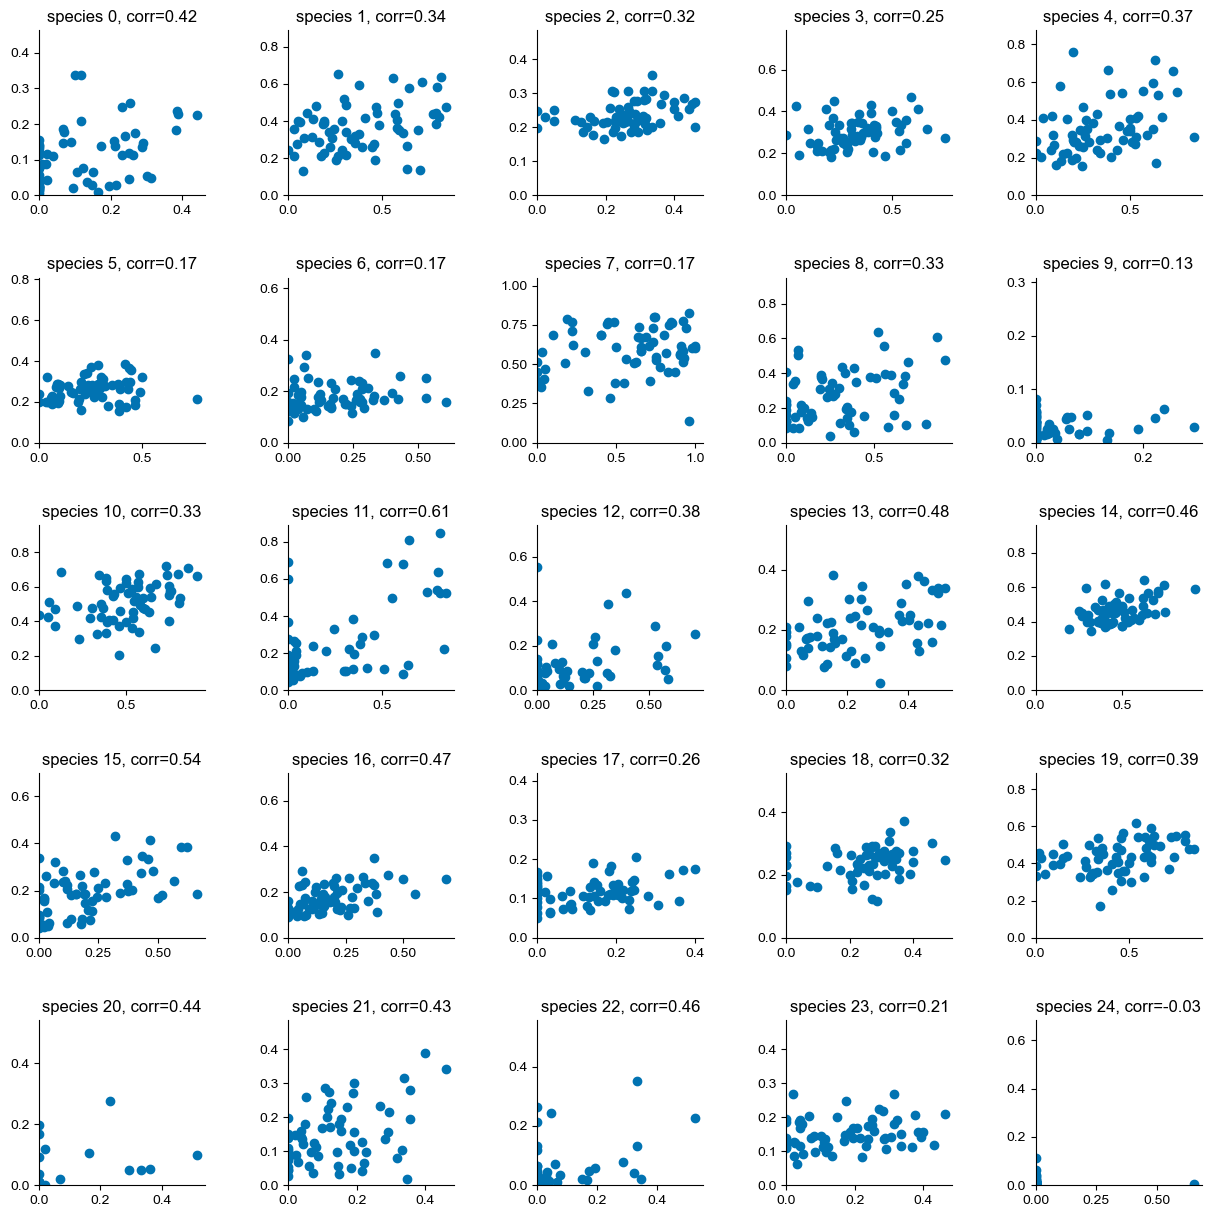

In [ ]:
inds_species = np.arange(25)

n_species = len(inds_species)
n_cols = 5
n_rows = int(np.ceil(n_species / n_cols))
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15),
                       gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i, axi in enumerate(ax.flatten()):
    if i < n_species:
        axi.scatter(label[:, i], pred[:, i])
        rfv.despine(axi)
        rfv.equal_xy_lims(axi)
        rfv.set_min_lims_to_0(axi)
        corr = np.corrcoef(label[:, i], pred[:, i])[0, 1]
        axi.set_title(f'species {i}, corr={corr:.2f}') 
    else:
        axi.axis('off')

torch.Size([10, 32])


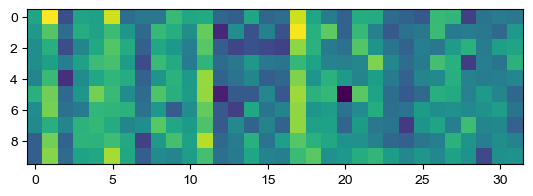

In [ ]:
tmp_pred = tmp_model.resnet(multi_data_sample)
print(tmp_pred.shape)
plt.imshow(tmp_pred.detach().numpy())
# torch.nn.functional.normalize(tmp_pred, p=1, dim=1).abs().sum(1)

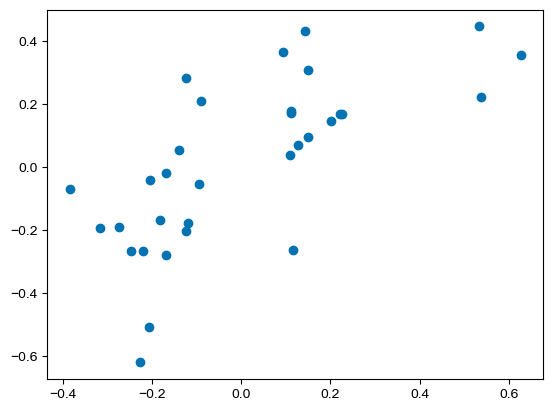

In [ ]:
plt.scatter(tmp_pred[0, :].detach().numpy(), tmp_pred[5, :].detach().numpy())

In [ ]:

target = torch.tensor([[.3, .1, .2, .1],[.1, 1, .3, .5]])
preds = torch.tensor([[0.1, 0.9, 0, 0], [0.2, 0.1, 0.5, 0.2]])
assert preds.shape[0] == target.shape[0], f'preds.shape[0] = {preds.shape[0]} != target.shape[0] = {target.shape[0]}'

loss_fn = torch.nn.BCELoss(reduction='none')
intermediate_loss = loss_fn(preds, target)
weights = torch.tensor([3.1, .2, 1.3, .4])
# print(intermediate_loss)
print(intermediate_loss)
final_loss = (intermediate_loss * weights)
final_loss.mean()

tensor([[ 0.7645,  2.0829, 20.0000, 10.0000],
        [ 0.3618,  2.3026,  0.6931,  0.9163]])


tensor(4.4545)

In [ ]:
n_samples = 6
n_classes = 5
## create two random torch matrices
# matrix 1
matrix1 = np.random.rand(n_samples, n_classes)
# matrix 2
matrix2 = np.random.rand(n_samples, n_classes)
matrix1 = torch.tensor(matrix1).float()
matrix2 = torch.tensor(matrix2).float()
assert matrix1.ndim == 2
tmp = torch.mm(matrix1, matrix1.t())

print(tmp.sum(0), tmp.sum(1))

tensor([5.9671, 7.0691, 7.5548, 8.7021, 6.4149, 2.7796]) tensor([5.9671, 7.0691, 7.5548, 8.7021, 6.4149, 2.7796])


In [ ]:
dist1 = pem.normalised_softmax_distance_batch(matrix1, exclude_diag_in_denominator=False, flatten=True)
dist2 = pem.normalised_softmax_distance_batch(matrix2, exclude_diag_in_denominator=False, flatten=True)

torch.Size([2, 15]) torch.Size([6, 6])
torch.Size([2, 15]) torch.Size([6, 6])


## Look at PECL pass
Look at:
- Distribution of s_ij values
- Distribution of w_ij values
- Steps of PECL pass

In [ ]:
ds = DataSetImagePresence(image_folder=path_dict_pecl['s2bms_images'],
                              presence_csv=path_dict_pecl['s2bms_presence'],
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')
train_dl = DataLoader(ds, batch_size=64, shuffle=False)

# tmp_model = pem.ImageEncoder(n_species=ds.n_species, n_bands=4, freeze_resnet=True,
#                              pecl_distance_metric='softmax', n_enc_channels=256,
#                              training_method='pecl',
#                              pretrained_resnet='seco')
tmp_model = pem.load_model(filename='PECL-ImEn_2024-02-27-1944_vnum-139.data')


tmp_model.eval() 


Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.
Loaded ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bi

ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
tmp_bool_use_dl = False

if tmp_bool_use_dl:
    with torch.no_grad():
        for i_batch, batch in tqdm(enumerate(train_dl)):
            im, label = batch 
            
            im = im.to(tmp_model.device)
            im_enc = tmp_model.forward(im)
            pred = tmp_model.prediction_model(im_enc)
            
            if i_batch == 0:
                all_labels = label.clone() 
                all_im_encs = im_enc.clone()
                all_preds = pred.clone()
            else:
                all_labels = torch.cat([all_labels, label], dim=0)
                all_im_encs = torch.cat([all_im_encs, im_enc], dim=0)
                all_preds = torch.cat([all_preds, pred], dim=0)
            
            if i_batch == 0:
                break
else:
    all_labels = []
    for sample in tqdm(ds):
        all_labels.append(sample[1][None, :])
    all_labels = torch.cat(all_labels, dim=0)

100%|██████████| 1329/1329 [01:21<00:00, 16.33it/s]


In [ ]:
# ds.df_presence.tuple_coords
coords_points = [shapely.geometry.Point(ast.literal_eval(loc)) for loc in ds.df_presence.tuple_coords]
gdf = gpd.GeoDataFrame(ds.df_presence, geometry=coords_points)
gdf.crs = {'init': 'epsg:4326'}
gdf = gdf.to_crs(epsg=27700)
gdf["row_id"] = gdf.index + 1
gdf.reset_index(drop=True, inplace=True)
gdf.set_index("row_id", inplace = True)
gdf.to_file('/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.shp')

/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/vg/lgb0bh9x2yx0ny2lk_h8_ylc0000gr/T/ipykernel_47024/3944412378.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.shp')


In [ ]:
gdf.columns

Index(['tuple_coords', 'Melanargia galathea', 'Pieris napi',
       'Aphantopus hyperantus', 'Aglais io', 'Polyommatus icarus',
       'Vanessa atalanta', 'Lycaena phlaeas', 'Pararge aegeria',
       'Gonepteryx rhamni', 'Thymelicus lineola', 'Pieris rapae',
       'Coenonympha pamphilus', 'Aricia agestis', 'Polygonia c-album',
       'Maniola jurtina', 'Aglais urticae', 'Vanessa cardui',
       'Thymelicus sylvestris', 'Pyronia tithonus', 'Pieris brassicae',
       'Lysandra coridon', 'Celastrina argiolus', 'Speyeria aglaja',
       'Ochlodes venata', 'Plebejus argus', 'Lasiommata megera',
       'Anthocharis cardamines', 'Argynnis paphia', 'Callophrys rubi',
       'Ladoga camilla', 'Leptidea sinapis', 'Boloria selene',
       'Satyrium w-album', 'Erynnis tages', 'Mellicta athalia',
       'Pyrgus malvae', 'Euphydryas aurinia', 'Lysandra bellargus',
       'Quercusia quercus', 'Colias croceus', 'Hesperia comma',
       'Cupido minimus', 'Hipparchia semele', 'Clossiana euphrosyne',
  

In [ ]:
all_labels_norm = F.normalize(all_labels, p=2, dim=1)
# all_preds_norm = F.normalize(all_preds, p=2, dim=1)

Number of species: 62, number of labels: 1329


<Axes: xlabel='cos similarity $s_{ij}$', ylabel='Number of pairs'>

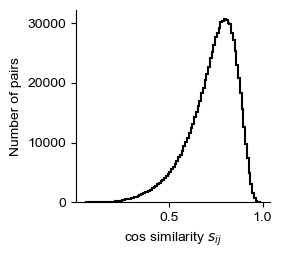

In [ ]:
dvu.plot_distr_label_inner_prod(all_labels_norm.cpu().detach().numpy(),
                                save_fig=True) 

In [ ]:
temperature = 1

all_labels_inner = pem.normalised_softmax_distance_batch(all_labels_norm, temperature=temperature, knn=None,
                                                      knn_hard_labels=False, inner_prod_only=True,
                                                      exclude_diag_in_denominator=False, flatten=False)
all_labels_inner = all_labels_inner.cpu().detach().numpy()

all_labels_sm = pem.normalised_softmax_distance_batch(all_labels_norm, temperature=temperature, knn=None,
                                                      knn_hard_labels=False, 
                                                      exclude_diag_in_denominator=False, flatten=False)

# all_im_encs_sm = pem.normalised_softmax_distance_batch(all_im_encs, temperature=temperature, knn=None,
#                                                         exclude_diag_in_denominator=False, flatten=False)
# all_im_encs_sm = all_im_encs_sm.cpu().detach().numpy()
all_labels_sm = all_labels_sm.cpu().detach().numpy()

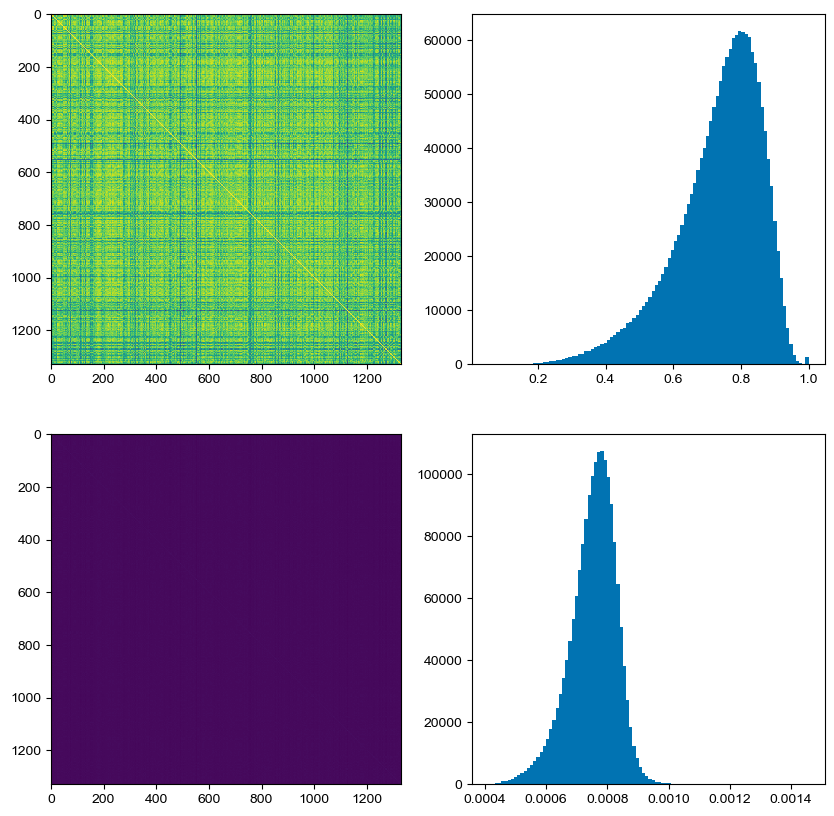

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# ax[0, 0].imshow(all_im_encs_sm, vmin=0, vmax=0.05, interpolation='none')
# ax[0, 1].hist(all_im_encs_sm.ravel(), bins=100)

ax[0, 0].imshow(all_labels_inner, vmin=0, vmax=1, interpolation='none')
ax[0, 1].hist(all_labels_inner.ravel(), bins=100)

ax[1, 0].imshow(all_labels_sm, vmin=0, vmax=0.03, interpolation='none')
ax[1, 1].hist(all_labels_sm.ravel(), bins=100);

In [ ]:
inds_nz = np.where(all_labels_sm > 0)
all_labels_nz = all_labels_sm[inds_nz]
all_im_encs_nz = all_im_encs_sm[inds_nz]

# all_im_encs_nz.shape, all_labels_nz.shape
(-1 * np.log(all_im_encs_nz + 1e-8) * all_labels_nz).mean()

0.076133385

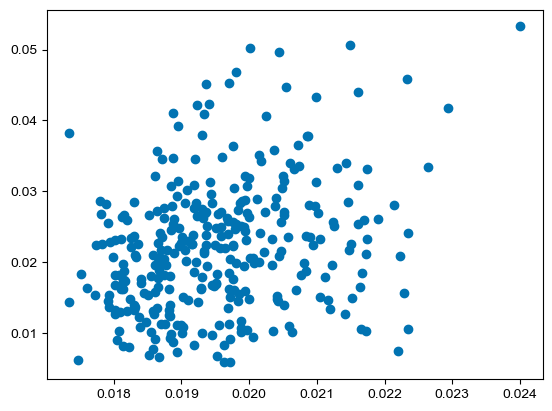

In [ ]:
# plt.scatter(all_labels_sm.ravel(), all_im_encs_sm.ravel())
plt.scatter(all_labels_nz, all_im_encs_nz)

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(12, 4))


# ax[0].hist(all_labels_sm, bins=100)
# ax[0].set_title('all_labels_sm')

# ax[1].hist(all_im_encs_sm, bins=100)
# ax[1].set_title('all_im_encs_sm')

# # ax[2].scatter(all_labels_sm, all_im_encs_sm)
# # ax[2].set_xlabel('all_labels_sm')
# # ax[2].set_ylabel('all_im_encs_sm')

In [ ]:
# all_labels_norm_demeaned = all_labels_norm - all_labels_norm.mean(0)
# inner_prod_labels = torch.mm(all_labels_norm_demeaned, all_labels_norm_demeaned.t())
inner_prod_labels = torch.mm(all_labels_norm, all_labels_norm.t())
## set diag to 0
inner_prod_labels = inner_prod_labels - torch.diag(inner_prod_labels.diag())

Got 63 nearest neighbours
[0.983 0.97  0.958 0.943 0.936]


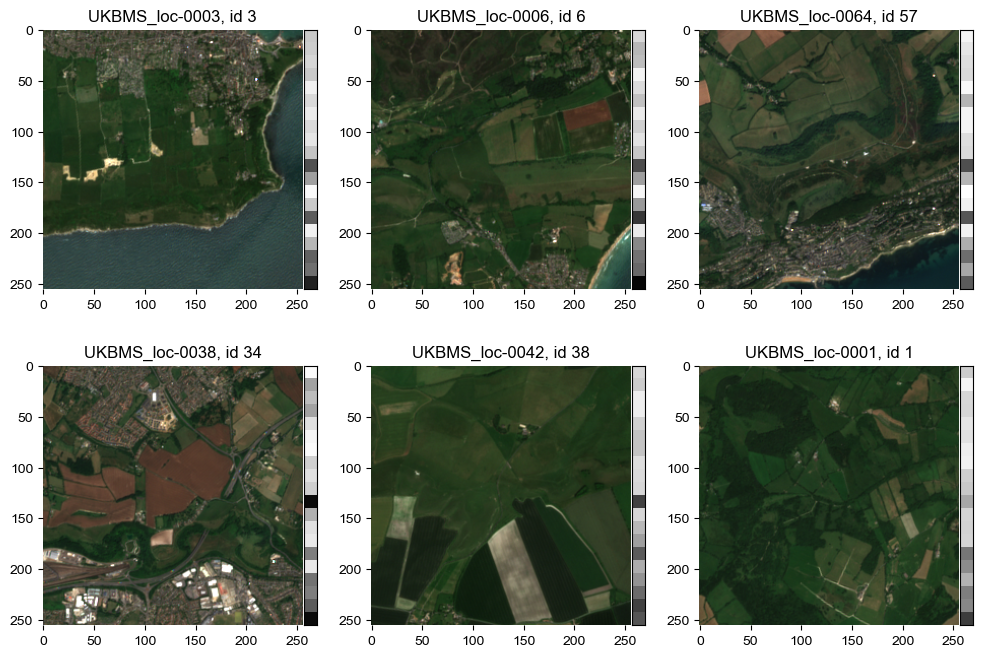

In [ ]:

focal_ind = 3

## Using PECL Knn:
# inds_nz = torch.where(all_labels_sm > 0)
# inds_nn = inds_nz[1][inds_nz[0] == focal_ind]
# assert len(inds_nn) == 5, f'len(inds_nn)={len(inds_nn)}'

## Using inner product:
inds_nn = torch.where(inner_prod_labels[focal_ind, :] > 0.15)[0]
print(f'Got {len(inds_nn)} nearest neighbours')
## sort:
inds_nn = inds_nn[torch.argsort(inner_prod_labels[focal_ind, inds_nn], descending=True)]

inds_plot = [focal_ind] + inds_nn.tolist()
inds_plot = inds_plot[:6]
vals_inner = inner_prod_labels[focal_ind, inds_plot[1:]]
## round decimals:
vals_inner = np.round(vals_inner.numpy(), 3)
print(vals_inner)
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.ravel()

for i_ind, ind in enumerate(inds_plot):
    ds.plot_image(ind, ax=ax[i_ind])

(array([262., 408., 452., 390., 365., 370., 330., 321., 303., 263., 221.,
        140.,  99.,  62.,  37.,  23.,  16.,  11.,   8.]),
 array([0.        , 0.00263158, 0.00526316, 0.00789474, 0.01052632,
        0.01315789, 0.01578947, 0.01842105, 0.02105263, 0.02368421,
        0.02631579, 0.02894737, 0.03157895, 0.03421053, 0.03684211,
        0.03947368, 0.04210526, 0.04473684, 0.04736842, 0.05      ]),
 <BarContainer object of 19 artists>)

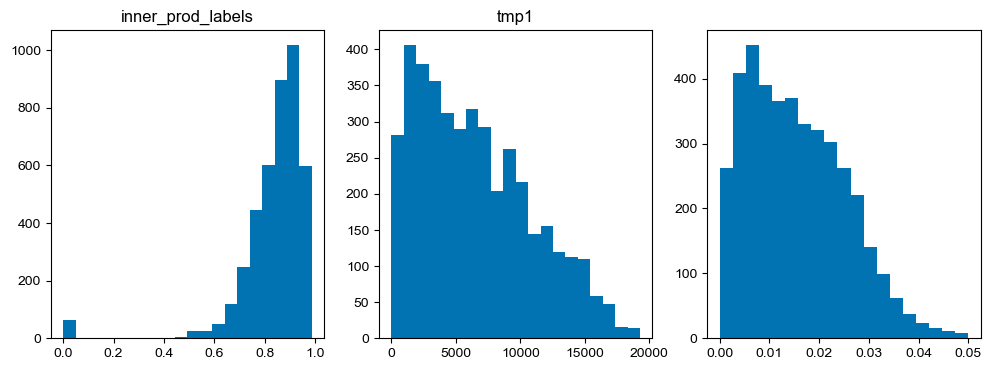

In [ ]:
# inner_prod_labels = torch.mm(all_labels_norm, all_labels_norm.t())
tmp1 = inner_prod_labels / 0.1 
tmp1 = torch.exp(tmp1)
tmp2 = torch.sum(tmp1, dim=1) - torch.diag(tmp1)
tmp3 = tmp1 / tmp2[:, None]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(inner_prod_labels.numpy().ravel(), bins=20)
ax[0].set_title('inner_prod_labels')

ax[1].hist(tmp1.numpy().ravel(), bins=20)
ax[1].set_title('tmp1')

ax[2].hist(tmp3.numpy().ravel(), bins=np.linspace(0, 0.05, 20))


# Random search results

In [ ]:
folder_tb = '/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/models/PECL/random_search/'
folder_models = '/Users/t.vanderplas/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/models/PECL/random_search/full_models/'

content_models = os.listdir(folder_models)
content_models = [x for x in content_models if x.endswith('.data')]
len(content_models)

for model_name in tqdm(content_models):
    vnum = int(model_name.split('vnum-')[1].split('.')[0])
    if vnum >= 108:
        print(vnum)
        tmp_model = pem.test_model(model_path=model_name,
                                tb_log_folder=folder_tb)

  0%|          | 0/90 [00:00<?, ?it/s]Seed set to 86
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_110/checkpoints/best_checkpoint_val-epoch=08-val_loss=0.30-train_loss=0.29.ckpt


110
Loaded ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

Loaded model weights from the checkpoint at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_110/checkpoints/best_checkpoint_val-epoch=08-val_loss=0.30-train_loss=0.29.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃           Test metric           ┃          DataLoader 0           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          test_bce_loss          │       0.2320001721382141        │
│          test_ce_loss           │       26.225852966308594        │
│ test_distance_pred_label_means  │      0.025475332513451576       │
│            test_loss            │       0.29714909195899963       │
│          test_mae_loss          │       0.06346160918474197       │
│          test_mse_loss          │      0.013269242830574512       │
│     test_pecl-softmax_loss      │       0.06514889001846313       │
│ test_pred-bce_pecl-softmax_loss │       0.29714909195899963       │
│      test_ratio_pred_pecl       │               inf               │
│         test_top_10_acc         │       0.6935483813285828        │
│         test_top_1_acc          │       0.4354838728904724        │
│         test_top_20_acc         │       0.8467741012573242        │
│         test_top_5_acc          │       0.6053763031959534        │
│     test_weighted-bce_loss      │       1.6759425401687622        │
│      test_weighted-ce_loss      │        104.0008316040039        │
└─────────────────────────────────┴─────────────────────────────────┘

 58%|█████▊    | 52/90 [02:27<01:47,  2.84s/it]Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_108/checkpoints/best_checkpoint_val-epoch=21-val_loss=0.29-train_loss=0.29.ckpt


Stats saved as PECL-ImEn_2024-03-08-0940_vnum-110_stats.pkl at /Users/t.vanderplas/models/PECL/random_search/stats/PECL-ImEn_2024-03-08-0940_vnum-110_stats.pkl
PECL-ImEn model saved as PECL-ImEn_2024-03-08-0940_vnum-110.data at /Users/t.vanderplas/models/PECL/random_search/full_models/PECL-ImEn_2024-03-08-0940_vnum-110.data
108
Loaded ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), s

Loaded model weights from the checkpoint at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_108/checkpoints/best_checkpoint_val-epoch=21-val_loss=0.29-train_loss=0.29.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃           Test metric           ┃          DataLoader 0           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          test_bce_loss          │       0.2280692607164383        │
│          test_ce_loss           │        25.3013858795166         │
│ test_distance_pred_label_means  │      0.025037335231900215       │
│            test_loss            │       0.29576101899147034       │
│          test_mae_loss          │      0.058766625821590424       │
│          test_mse_loss          │      0.012109663337469101       │
│     test_pecl-softmax_loss      │       0.06769177317619324       │
│ test_pred-bce_pecl-softmax_loss │       0.29576101899147034       │
│      test_ratio_pred_pecl       │               inf               │
│         test_top_10_acc         │       0.6956989169120789        │
│         test_top_1_acc          │       0.4193548262119293        │
│         test_top_20_acc         │       0.8521506190299988        │
│         test_top_5_acc          │       0.6225807070732117        │
│     test_weighted-bce_loss      │       1.5351283550262451        │
│      test_weighted-ce_loss      │        97.44456481933594        │
└─────────────────────────────────┴─────────────────────────────────┘

 69%|██████▉   | 62/90 [04:33<02:18,  4.93s/it]Seed set to 17
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_109/checkpoints/best_checkpoint_val-epoch=10-val_loss=0.30-train_loss=0.29.ckpt


Stats saved as PECL-ImEn_2024-03-08-0925_vnum-108_stats.pkl at /Users/t.vanderplas/models/PECL/random_search/stats/PECL-ImEn_2024-03-08-0925_vnum-108_stats.pkl
PECL-ImEn model saved as PECL-ImEn_2024-03-08-0925_vnum-108.data at /Users/t.vanderplas/models/PECL/random_search/full_models/PECL-ImEn_2024-03-08-0925_vnum-108.data
109
Loaded ImageEncoder(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), s

Loaded model weights from the checkpoint at /Users/t.vanderplas/models/PECL/random_search/lightning_logs/version_109/checkpoints/best_checkpoint_val-epoch=10-val_loss=0.30-train_loss=0.29.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃           Test metric           ┃          DataLoader 0           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          test_bce_loss          │       0.22596049308776855       │
│          test_ce_loss           │        25.46933364868164        │
│ test_distance_pred_label_means  │      0.025096606463193893       │
│            test_loss            │       0.29274216294288635       │
│          test_mae_loss          │       0.06068497151136398       │
│          test_mse_loss          │      0.011934133246541023       │
│     test_pecl-softmax_loss      │       0.06678169220685959       │
│ test_pred-bce_pecl-softmax_loss │       0.29274216294288635       │
│      test_ratio_pred_pecl       │               inf               │
│         test_top_10_acc         │        0.689247190952301        │
│         test_top_1_acc          │       0.3817204236984253        │
│         test_top_20_acc         │       0.8537634611129761        │
│         test_top_5_acc          │       0.6225805878639221        │
│     test_weighted-bce_loss      │       1.4103326797485352        │
│      test_weighted-ce_loss      │        91.20117950439453        │
└─────────────────────────────────┴─────────────────────────────────┘

100%|██████████| 90/90 [07:02<00:00,  4.70s/it]

Stats saved as PECL-ImEn_2024-03-08-0932_vnum-109_stats.pkl at /Users/t.vanderplas/models/PECL/random_search/stats/PECL-ImEn_2024-03-08-0932_vnum-109_stats.pkl
PECL-ImEn model saved as PECL-ImEn_2024-03-08-0932_vnum-109.data at /Users/t.vanderplas/models/PECL/random_search/full_models/PECL-ImEn_2024-03-08-0932_vnum-109.data
